**Regression-Analysis-on-Automobile-Dataset**

# **DATA ANALYTICS LABORATORY**


---


# PRACTICAL NO. 5

---

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df_clean = pd.read_csv('df_clean.csv')
df_clean.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [8]:
df_clean.shape

(201, 26)

In [21]:
X = df_clean.loc[:, ['drive-wheels', 'width', 'curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]
y = df_clean['price']

In [22]:
X

,drive-wheels,width,curb-weight,engine-size,horsepower,highway-mpg
0,rwd,64.1,2548,130,111.0,27
1,rwd,64.1,2548,130,111.0,27
2,rwd,65.5,2823,152,154.0,26
3,fwd,66.2,2337,109,102.0,30
4,4wd,66.4,2824,136,115.0,22
...,...,...,...,...,...,...
196,rwd,68.9,2952,141,114.0,28
197,rwd,68.8,3049,141,160.0,25
198,rwd,68.9,3012,173,134.0,23
199,rwd,68.9,3217,145,106.0,27


In [23]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [24]:
X = pd.get_dummies(X, columns=['drive-wheels'])
X

,width,curb-weight,engine-size,horsepower,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,64.1,2548,130,111.0,27,0,0,1
1,64.1,2548,130,111.0,27,0,0,1
2,65.5,2823,152,154.0,26,0,0,1
3,66.2,2337,109,102.0,30,0,1,0
4,66.4,2824,136,115.0,22,1,0,0
...,...,...,...,...,...,...,...,...
196,68.9,2952,141,114.0,28,0,0,1
197,68.8,3049,141,160.0,25,0,0,1
198,68.9,3012,173,134.0,23,0,0,1
199,68.9,3217,145,106.0,27,0,0,1


In [25]:
X.head()

,width,curb-weight,engine-size,horsepower,highway-mpg,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd
0,64.1,2548,130,111.0,27,0,0,1
1,64.1,2548,130,111.0,27,0,0,1
2,65.5,2823,152,154.0,26,0,0,1
3,66.2,2337,109,102.0,30,0,1,0
4,66.4,2824,136,115.0,22,1,0,0


# Splitting the dataset into the Training set and Test set


In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .2, random_state=42)

# Multiple Linear Regression

In [27]:
# Training the MLR model on the Training set
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
regressor = Ridge(alpha=0.0000000001)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.28585e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge(alpha=1e-10)

In [28]:
# Predicting the Test set results
yhat = regressor.predict(X_test)


## Evaluation

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat)

0.7684202111509028

In [30]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, yhat))

5322.878908716363

**Visualizing a model for Multiple Linear Regression**

**Distribution plot** : Compare the distribution of the fitted values that result from the model and distribution of the actual values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


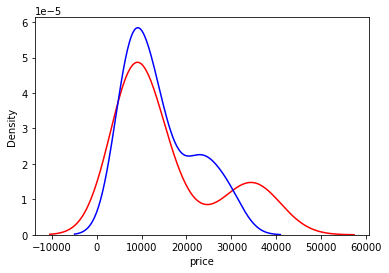

In [31]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Polynomial Regression

In [32]:
X_train_adj = X_train[['width','curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]
X_test_adj = X_test[['width','curb-weight', 'engine-size', 'horsepower', 'highway-mpg']]

In [33]:
# Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train_adj)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y_train)

LinearRegression()

In [34]:
# Predicting the Test set results
yhat_poly = regressor_poly.predict(poly_reg.transform(X_test_adj))
yhat_poly

array([ 6664.09486012, 21785.63969323,  6066.5463758 ,  7214.40741416,
       12672.21597736,  5992.56571767, 27748.44992665, 10904.10074656,
       17818.89698615, 29469.70119066, 21139.48901116,  9416.65328317,
       14127.97612884, 10471.19846411, 14261.84347735,  8974.46005838,
       10685.14787041,  6999.55002033, 10552.79553838, 27463.54636424,
       27886.06442356, 20733.5816323 ,  6001.51475719,  6531.24002055,
       22383.605259  , 10488.58148878, 11950.73749711, 24575.14149039,
       27612.5801354 , 17925.56600975, 10299.05276579,  6159.35861701,
       16291.60387714,  6270.67464194,  6039.11290172, 16198.77695869,
        8537.70589888,  8190.93238366, 14124.24282421,  9684.95348732,
       16660.48605443])

## Evaluation

In [35]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_poly)

0.7605090558808807

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_poly)

29300944.195500817

**Visualizing a model for Polynomial Linear Regression**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


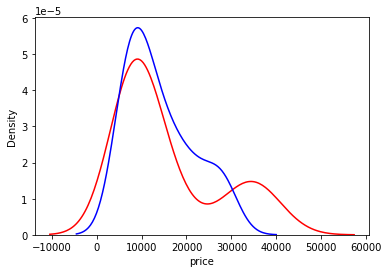

In [37]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_poly, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Decision Tree Regression

In [38]:
# Training the Decision Tree Regression model on the Training set
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state=42)
regressor_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
# Predicting the Test set results
yhat_tree = regressor_tree.predict(X_test)

## Evaluation

In [40]:
from sklearn.metrics import r2_score
r2_score(y_test, yhat_tree)

0.9442073819480766

In [41]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, yhat_tree)

6826046.780487805

**Visualizing a model for Decision Tree Regression**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


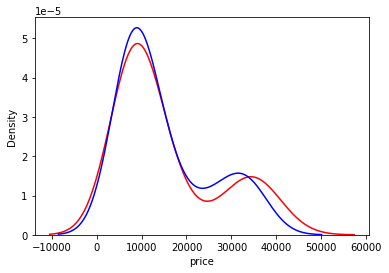

In [42]:
ax1=sns.distplot(y_test, hist=False, color="r", label="Actual Values")
sns.distplot(yhat_tree, hist=False, color="b", label="Fitted Values", ax=ax1)
plt.show()

# Decision Making: Determining a Good Model Fit

**Model with the higher R-squared value is a better fit for the data.**

**Model with the smallest MSE value is a better fit for the data.**

Let's take a look at the values for the different models.

### Multiple Linear Regression : 

Using Drive wheels, Width, Curb weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.7684202111509028**

**RMSE: 5322.878908716363**

### Polynomial Regression 

Using Width, Curb Weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.7605090558808807**

**MSE: 29300944.195500817**

### Decision Tree Regression

Using Drive wheels, Width, Curb weight, Engine size, Horsepower, Highway mpg as Predictor Variables of Price.

**R-squared: 0.9442073819480766**

**MSE: 6826046.780487805**



## Conclusion:

Comparing these models, we conclude that the Decision Tree Regression model is the best model to be able to predict price from our dataset, followed by  MLR 

# **DATA ANALYTICS LABORATORY**

**ATHARV KISHOR CHAUDHARI**

*B.E. - B*

*ROLL NO. 08*

In [43]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "./drive/My Drive/Colab Notebooks/PRINT-Exploratory_Data_Analysis_on_Automobile_Dataset.ipynb" ./